# TF - IDF

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

data=pd.read_csv("лаб3/books_data.csv",header=0, nrows=2500)
data1= data[['Title','description', 'categories']]
data1

,Title,description,categories
0,Its Only Art If Its Well Hung!,NaN,['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Biography & Autobiography']
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['Religion']
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Fiction']
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,NaN
...,...,...,...
2495,The Mission: Inside the Church of Jesus Christ...,NaN,NaN
2496,Well-dressed Gentleman's Pocket Guide,This is the must-have accessory for any style-...,NaN
2497,The Secret Architecture of Our Nation's Capita...,"Today, there are more than twenty complete zod...",['History']
2498,Summer of My German Soldier,When German prisoners of war are brought to he...,['Juvenile Fiction']


In [3]:
data_without_nan = data1.dropna()
data1=data_without_nan
#data1


In [4]:
import timeit
#content.info()

In [5]:
#start_time = timeit.default_timer()

tfidf = TfidfVectorizer(stop_words='english')
content = data1['description'].fillna('')

tfidf_matrix = tfidf.fit_transform(content)
from sklearn.metrics.pairwise import cosine_similarity

# Измерение косинусной близости между всеми парами документов
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

#end_time = timeit.default_timer()
#execution_time = end_time - start_time
#print(f"Время выполнения: {execution_time} секунд")

In [6]:
res = [2.77132, 2.85484, 4.51864, 6.30538]
times = [10000,15000,20000,25000]

In [7]:
# 2.7713230659999226 секунд 10000
#2.8548438259999784 секунд 15000
#4.518643082999915 секунд 20000
# 6.305387742999983 секунд 25000


In [8]:
content[1]

'Philip Nel takes a fascinating look into the key aspects of Seuss\'s career - his poetry, politics, art, marketing, and place in the popular imagination." "Nel argues convincingly that Dr. Seuss is one of the most influential poets in America. His nonsense verse, like that of Lewis Carroll and Edward Lear, has changed language itself, giving us new words like "nerd." And Seuss\'s famously loopy artistic style - what Nel terms an "energetic cartoon surrealism" - has been equally important, inspiring artists like filmmaker Tim Burton and illustrator Lane Smith. --from back cover'

In [9]:
tfidf_matrix

<1725x21291 sparse matrix of type '<class 'numpy.float64'>'
	with 85703 stored elements in Compressed Sparse Row format>

In [10]:
import numpy as np

# Пример: получение топ-N рекомендаций для каждого документа
top_n = 5

# Для каждого документа, получение топ-N схожих документов
recommendations = {}
for i in range(len(content)):
    sim_scores = list(enumerate(similarity_matrix[i]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    document_indices = [x[0] for x in sim_scores]
    recommendations[i] = document_indices


In [11]:
recommendations

{0: [1706, 511, 507, 652, 158],
 1: [1519, 1088, 853, 756, 887],
 2: [853, 32, 634, 630, 1263],
 3: [853, 1099, 1615, 1517, 916],
 4: [325, 1424, 221, 263, 209],
 5: [86, 732, 384, 529, 1447],
 6: [780, 1332, 237, 527, 933],
 7: [793, 314, 915, 1521, 119],
 8: [1698, 613, 1648, 1087, 1581],
 9: [1215, 63, 58, 810, 831],
 10: [1041, 71, 487, 1322, 417],
 11: [1095, 502, 481, 1285, 1578],
 12: [1120, 1594, 1021, 1547, 813],
 13: [1021, 1626, 834, 1202, 1120],
 14: [103, 280, 50, 1210, 423],
 15: [674, 1703, 182, 995, 276],
 16: [858, 46, 1432, 128, 494],
 17: [165, 984, 534, 285, 720],
 18: [121, 1087, 639, 405, 126],
 19: [178, 290, 1214, 1207, 207],
 20: [405, 1706, 893, 1130, 899],
 21: [1198, 511, 1480, 509, 414],
 22: [879, 1296, 917, 157, 925],
 23: [454, 1297, 1367, 1305, 1402],
 24: [853, 1504, 1012, 1061, 1678],
 25: [310, 368, 1620, 1671, 445],
 26: [476, 1470, 95, 870, 354],
 27: [264, 420, 1689, 71, 1234],
 28: [856, 1433, 429, 399, 1505],
 29: [527, 74, 1434, 643, 668],
 30:

In [12]:
data.iat[212403,1]

IndexError: index 212403 is out of bounds for axis 0 with size 2500

In [13]:
#!pip install wordcloud

from wordcloud import WordCloud
feature_names = tfidf.get_feature_names_out()

# Получение TF-IDF значения для каждого слова в корпусе
tfidf_values = tfidf_matrix.sum(axis=0).A1

# Создание словаря слов и их TF-IDF значений
word_tfidf = dict(zip(feature_names, tfidf_values))

# Инициализация WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_tfidf)

# Отображение WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'plt' is not defined

In [14]:
print(feature_names)
print(tfidf_values)

['00' '000' '000sheet' ... 'útil' 'útiles' 'łódź']
[0.06976705 4.79254328 0.13549657 ... 0.09545324 0.09545324 0.41401215]


In [15]:
print(tfidf_matrix)

  (0, 4537)	0.08781181397668163
  (0, 17533)	0.11160430481708938
  (0, 10879)	0.13024783722717018
  (0, 9512)	0.13024783722717018
  (0, 2905)	0.13554974035876668
  (0, 19095)	0.1227752244636755
  (0, 7371)	0.13024783722717018
  (0, 1543)	0.09801055490727248
  (0, 9919)	0.09968714028377935
  (0, 9605)	0.07370444776234637
  (0, 6620)	0.11993426894236521
  (0, 18462)	0.13024783722717018
  (0, 3171)	0.13554974035876668
  (0, 6454)	0.13554974035876668
  (0, 18851)	0.09135717615850351
  (0, 18251)	0.08647896365743755
  (0, 1539)	0.117473321332079
  (0, 11389)	0.14302235312226136
  (0, 7168)	0.12613536166195516
  (0, 12894)	0.13024783722717018
  (0, 21002)	0.08297651122895008
  (0, 12925)	0.04869910527339861
  (0, 8255)	0.10058632987177278
  (0, 10886)	0.08033920121318693
  (0, 3352)	0.0988297889219982
  :	:
  (1723, 16899)	0.10583205591209988
  (1723, 9505)	0.0939112128221602
  (1723, 4030)	0.08581692420984002
  (1723, 2557)	0.0475807075344375
  (1723, 18112)	0.06974520365566017
  (1723, 119

In [16]:
print("Словарь:", tfidf.get_feature_names_out())

# Вывод матрицы TF-IDF
print("TF-IDF Матрица:\n", tfidf_matrix.toarray())

Словарь: ['00' '000' '000sheet' ... 'útil' 'útiles' 'łódź']
TF-IDF Матрица:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
data1.iat[0,1]

'Philip Nel takes a fascinating look into the key aspects of Seuss\'s career - his poetry, politics, art, marketing, and place in the popular imagination." "Nel argues convincingly that Dr. Seuss is one of the most influential poets in America. His nonsense verse, like that of Lewis Carroll and Edward Lear, has changed language itself, giving us new words like "nerd." And Seuss\'s famously loopy artistic style - what Nel terms an "energetic cartoon surrealism" - has been equally important, inspiring artists like filmmaker Tim Burton and illustrator Lane Smith. --from back cover'

In [18]:
k=683
print(recommendations[k])
inf = recommendations[k]
print(data1.iat[k,0], data1.iat[k,2])
print('\n________\n')
for i in inf:
    print(data1.iat[i,0], data1.iat[i,2])

[312, 83, 1562, 1015, 908]
Essential Economics (Economist Essentials) ['Business & Economics']

________

The Transfer Society: Economic Expenditures on Transfer Activity ['Business & Economics']
Economics in one lesson ['Business & Economics']
Principles of Macroeconomics ['Business & Economics']
Economics & the Public Purpose ['Business & Economics']
Investing for Dummies ['Business & Economics']


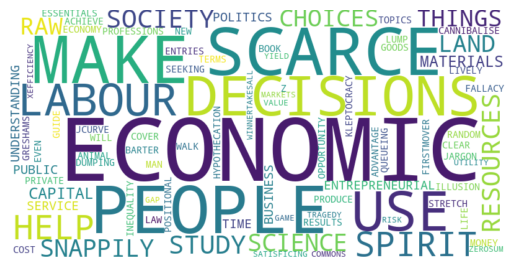

In [19]:
import string
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Пример текста


def gf(u):

    text = data1.iat[u, 1].upper()

    # Удаление знаков препинания
    sp_s = string.punctuation
    text = "".join([s for s in text if s not in sp_s])

    # Токенизация текста
    text_tokens = word_tokenize(text)
    text = nltk.Text(text_tokens)

    # Удаление стоп-слов
    sw = stopwords.words('english')
    text_tokens = [w for w in text_tokens if not w in sw]

    # Создание объекта FreqDist для подсчета частоты слов
    fd = FreqDist(text_tokens)

    # Создание облака слов
    wordcloud = WordCloud(width=800, height=400, background_color='white')
    wordcloud.generate_from_text(" ".join(text_tokens))

    # Отображение облака слов
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
##[312, 83, 96, 345, 511]
    
gf(683)

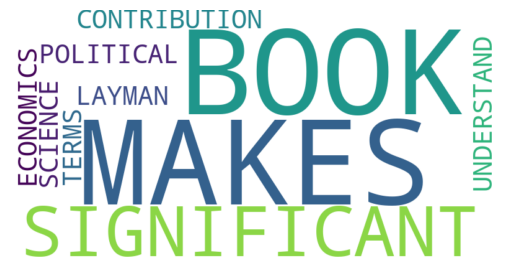

In [20]:
gf(312)

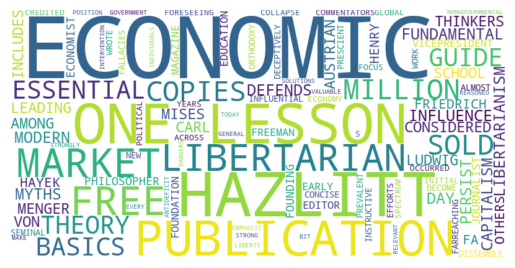

In [21]:
gf(83)

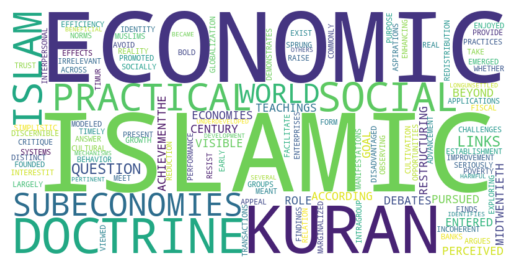

In [22]:
gf(96)

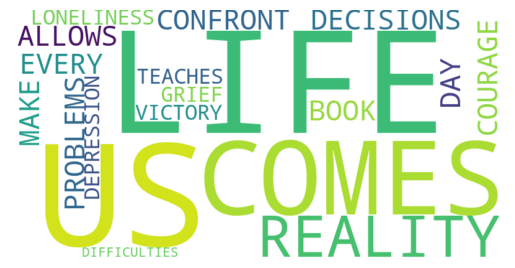

In [23]:
gf(345)

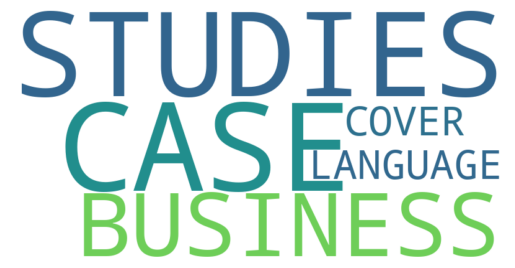

In [24]:
gf(511)

In [15]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)


In [ ]:
def get_recommendations(df, column, value, cosine_similarities, limit=10):
    """Return a dataframe of content recommendations based on TF-IDF cosine similarity.
    
    Args:
        df (object): Pandas dataframe containing the text data. 
        column (string): Name of column used, i.e. 'title'. 
        value (string): Name of title to get recommendations for, i.e. 1982 Ferrari 308 GTSi For Sale by Auction
        cosine_similarities (array): Cosine similarities matrix from linear_kernel
        limit (int, optional): Optional limit on number of recommendations to return. 
        
    Returns: 
        Pandas dataframe. 
    """
    
    # Return indices for the target dataframe column and drop any duplicates
    indices = pd.Series(df.index, index=df[column]).drop_duplicates()

    # Get the index for the target value
    target_index = indices[value]

    # Get the cosine similarity scores for the target value
    cosine_similarity_scores = list(enumerate(cosine_similarities[target_index]))

    # Sort the cosine similarities in order of closest similarity
    cosine_similarity_scores = sorted(cosine_similarity_scores, key=lambda x: x[1], reverse=True)

    # Return tuple of the requested closest scores excluding the target item and index
    cosine_similarity_scores = cosine_similarity_scores[1:limit+1]

    # Extract the tuple values
    index = (x[0] for x in cosine_similarity_scores)
    scores = (x[1] for x in cosine_similarity_scores)    

    # Get the indices for the closest items
    recommendation_indices = [i[0] for i in cosine_similarity_scores]

    # Get the actutal recommendations
    recommendations = df[column].iloc[recommendation_indices]

    # Return a dataframe
    df = pd.DataFrame(list(zip(index, recommendations, scores)), 
                      columns=['index','recommendation', 'cosine_similarity_score']) 

    return df